# Hawkes Processes

## Percolation Strength plots

### Algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funciones import *

# TODO
- Hacer cada figura para las distintas $K$

In [15]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

In [16]:
def generate_series_perc(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times_between_events, times, rate

In [17]:
def calculate_percolation_strength(times_between_events, deltas):
    percolation_strengths = []

    for delta in deltas:
        cluster_sizes = []
        # Initialize the size of the current cluster
        current_cluster_size = 1 # The first event is always a cluster

        for i in range(len(times_between_events)):
            if times_between_events[i] <= delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 1: # Only consider clusters with more than one event
                    cluster_sizes.append(current_cluster_size)
                # Reset the size of the current cluster
                current_cluster_size = 1 # The next event is always a cluster

        # Add the size of the last cluster
        if current_cluster_size > 1: # Only consider clusters with more than one event
            cluster_sizes.append(current_cluster_size)

        max_cluster_size = max(cluster_sizes) 

        percolation_strengths.append(max_cluster_size / len(times_between_events))
    return percolation_strengths

### My function to calculate percolation strength

We are going to plot the percolation plots for $K=10^6$ events and different configurations of $\mu$ and $n$

### First configuration $\mu=1$, $n=0$

In [18]:
K = 10**7
n = 1
mu = 100
times_between_events, times, rate = generate_series_perc(K, n, mu)

KeyboardInterrupt: 

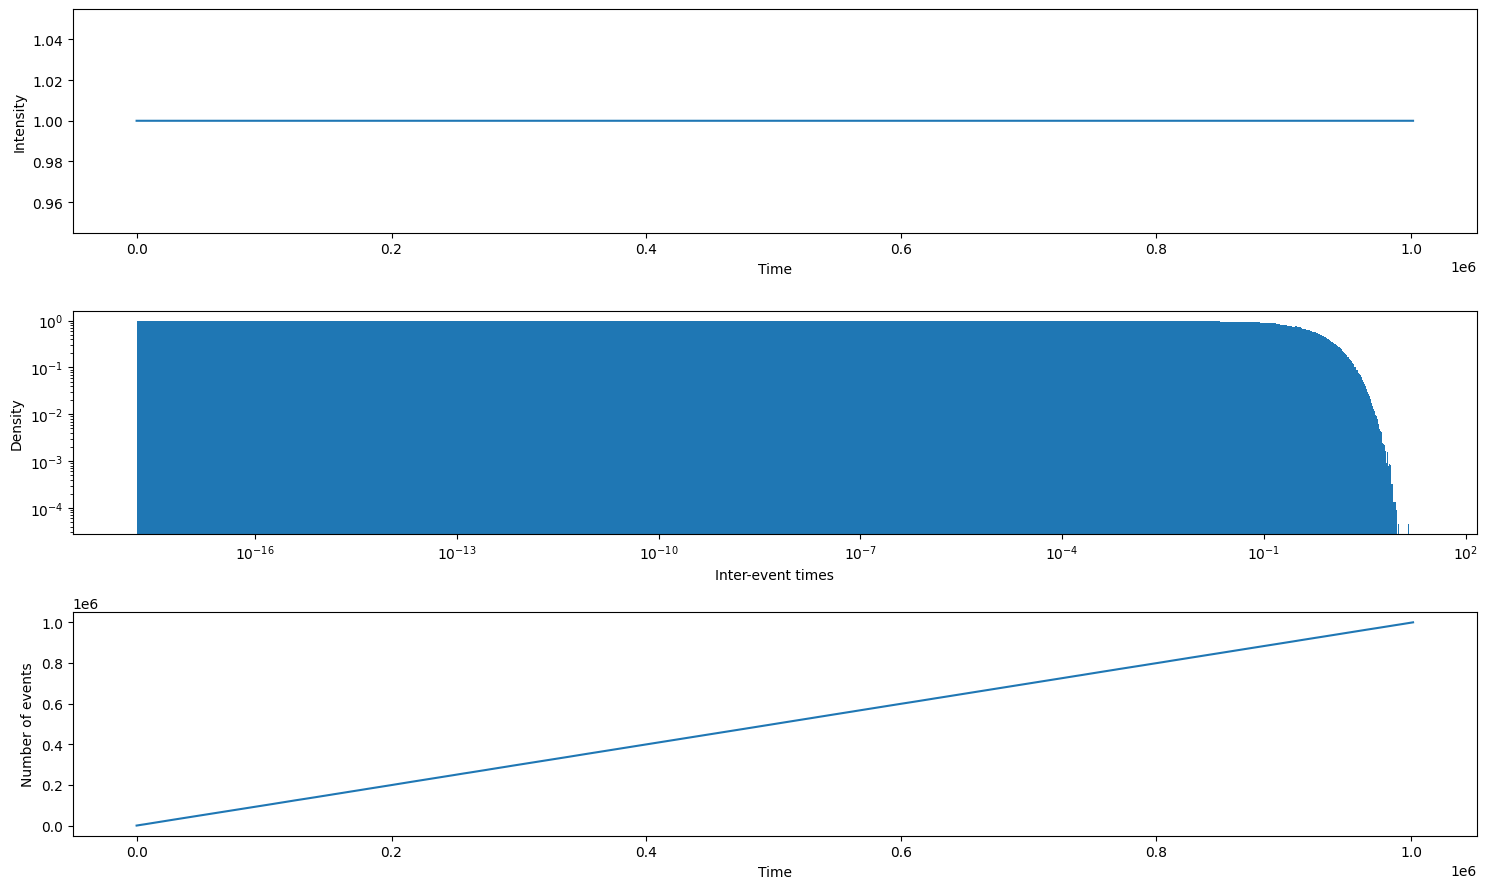

In [ ]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 'auto', density = True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')

fig.tight_layout()

In [ ]:
deltas = np.logspace(0, 2, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

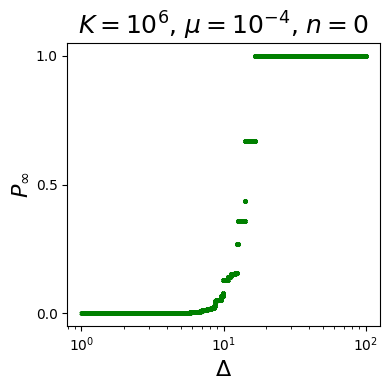

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$, $\mu = 10^{{1}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

### Now the parameters are $K=10^6$ events, $\mu=10^{-4}$ and $n=1$ 

In [ ]:
n = 1
mu = 10**-4
times_between_events, times, rate = generate_series_perc(K, n, mu)

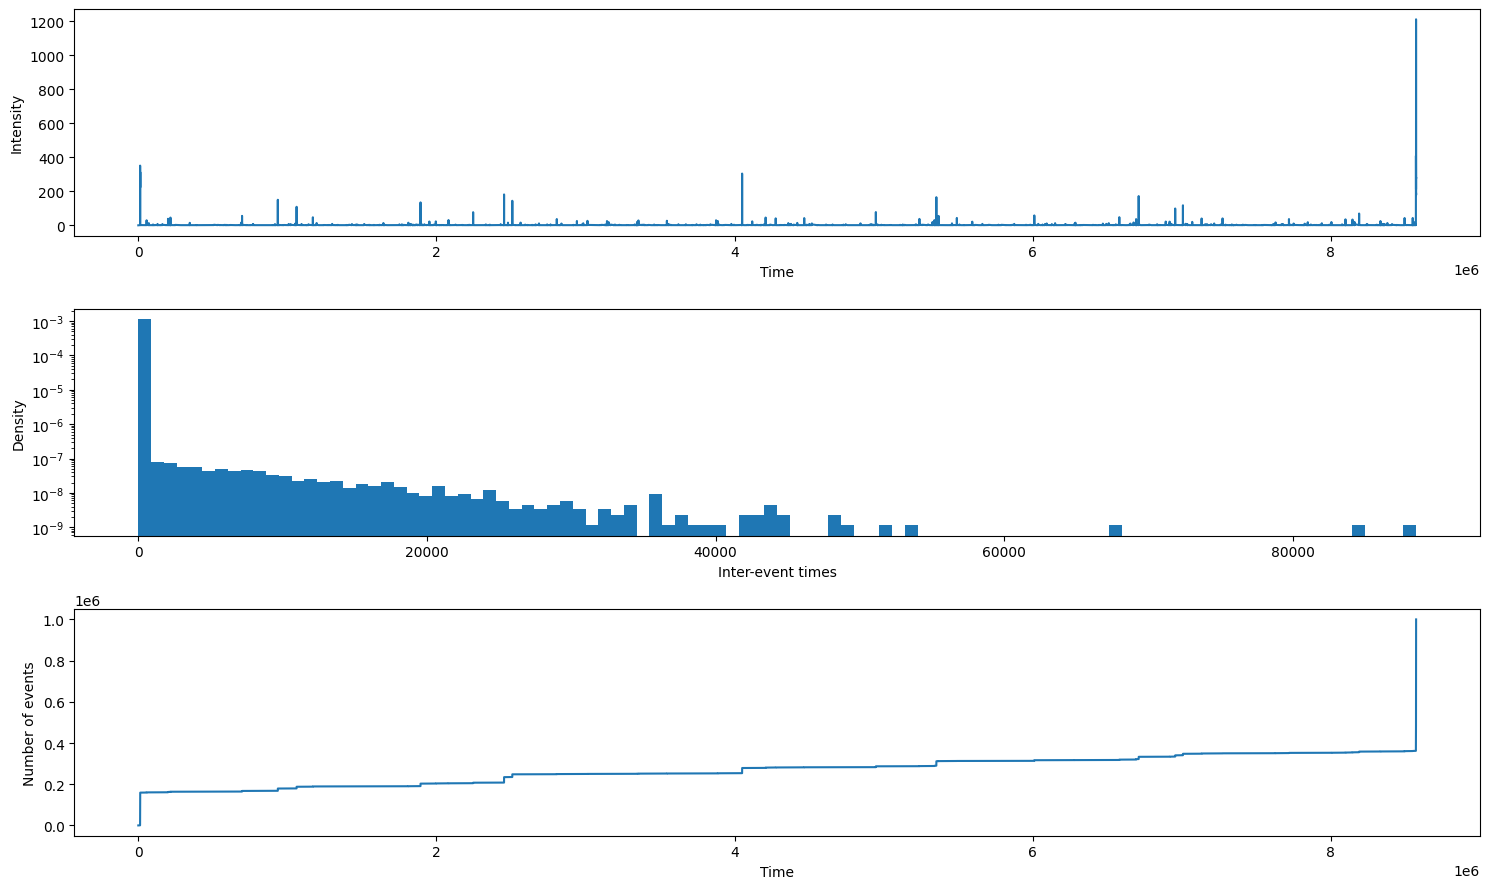

In [ ]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 100, density = True, log=True)
#ax1.set_xscale('log')
#ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')

fig.tight_layout()

In [ ]:
deltas = np.logspace(-4, 6, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

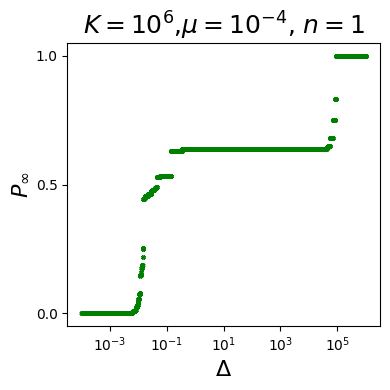

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$, $\mu = 10^{{-4}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

### Finally, the parameters are $\mu=10^2$ and n=1

In [ ]:
n = 1
mu = 10**2
times_between_events, times, rate = generate_series_perc(K, n, mu)

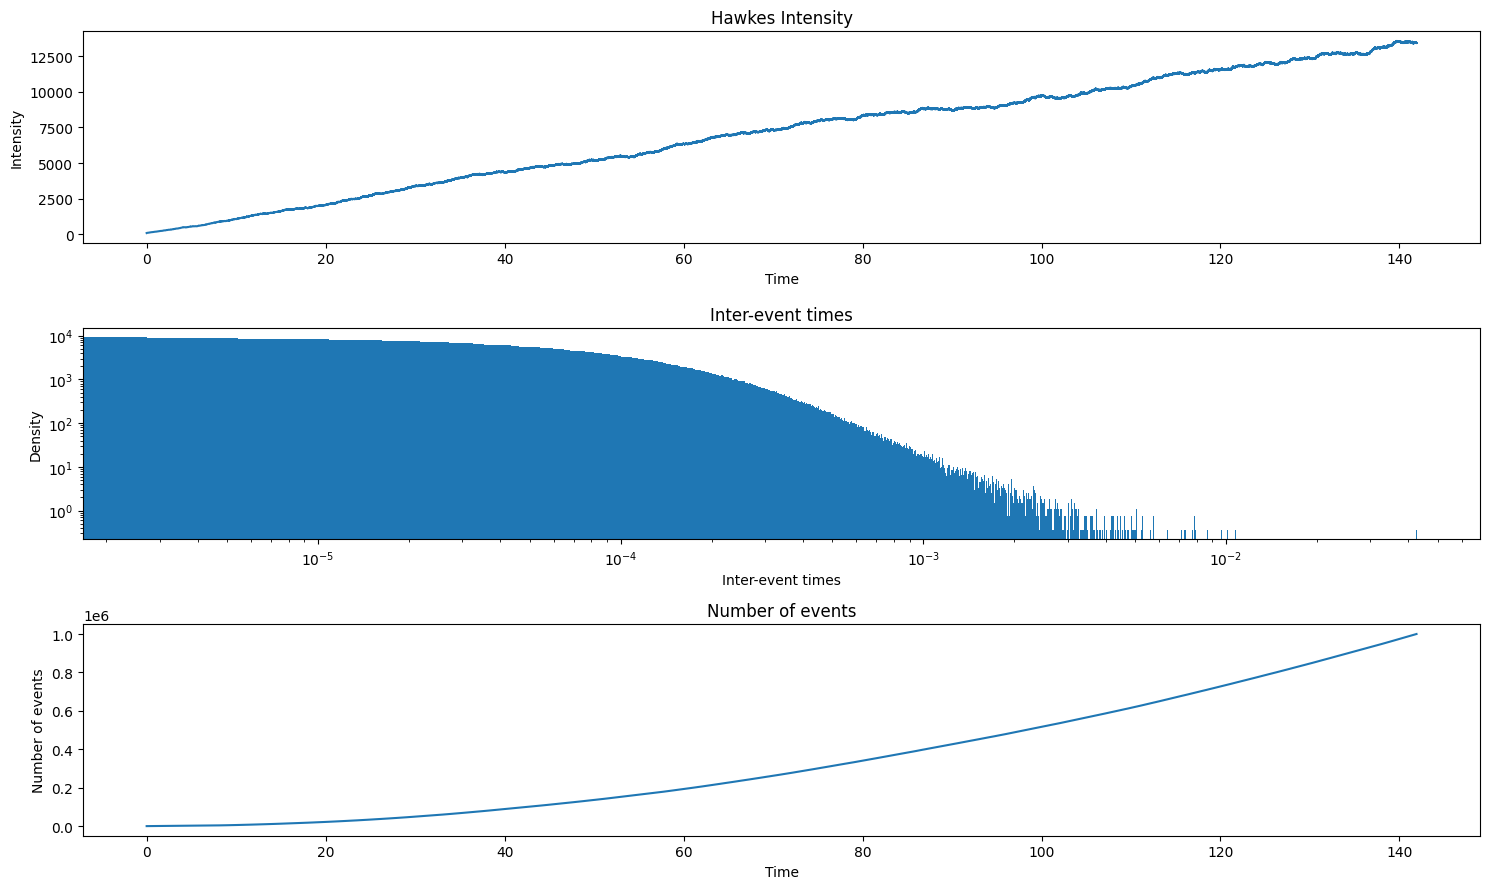

In [ ]:
fig = plt.figure(figsize=(15, 9))
axgrid = fig.add_gridspec(3, 1)

ax0 = fig.add_subplot(axgrid[0, 0])
ax0.plot(times, rate)
ax0.set_xlabel('Time')
ax0.set_ylabel('Intensity')
ax0.set_title('Hawkes Intensity')

ax1 = fig.add_subplot(axgrid[1, 0])
ax1.hist(times_between_events, bins = 'auto', density = True)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Inter-event times')
ax1.set_ylabel('Density')
ax1.set_title('Inter-event times')

ax2 = fig.add_subplot(axgrid[2, 0])
ax2.plot(times, np.arange(0,len(times)))
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of events')
ax2.set_title('Number of events')

fig.tight_layout()

In [ ]:
deltas = np.logspace(-4, -1, num = 10000, base = 10)
percolation_strength = calculate_percolation_strength(times_between_events, deltas)

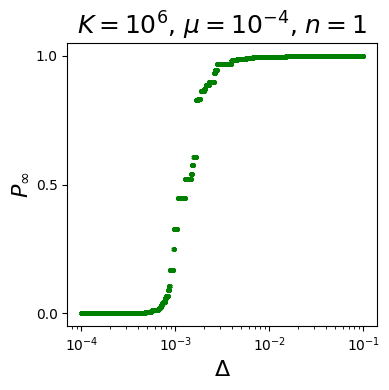

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(deltas, percolation_strength, color = 'green', marker = 'x', s = 5)
plt.xscale('log')
plt.yticks([0,0.5,1.0])
plt.xlabel('$\Delta$', fontsize = 16)
plt.ylabel('$P_{\infty}$', fontsize = 16)
plt.title(f'$K=10^6$, $\mu = 10^{{2}}$, $n = {n}$', fontsize = 18)
plt.tight_layout()

## This is from the pruebas.ipynb notebook

Repeat the process a given number of iterations to calculate the mean and smooth the curve

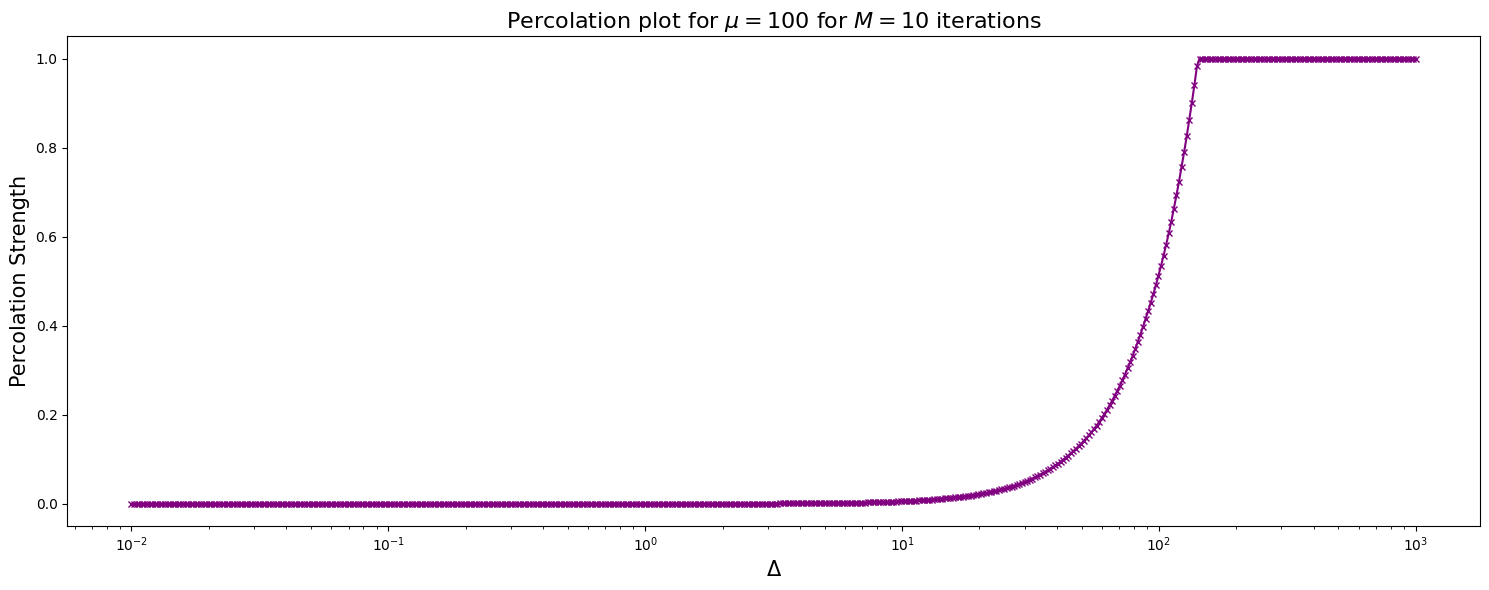

In [ ]:
percolation_strengths_list = []
n_iters = 10
deltas = np.logspace(-2, 3, num=500, base=10)
for _ in range(n_iters):
    percolation_strength = calculate_percolation_strength(times, deltas)
    percolation_strengths_list.append(percolation_strength)
    #print(f'Iteration {_} done')
mean_percolation_strengths = np.mean(percolation_strengths_list, axis=0)


plt.figure(figsize=(15, 6))
plt.plot(deltas, mean_percolation_strengths, color = 'purple', marker='x', ms=5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength', fontsize=15)
plt.title(f'Percolation plot for $\mu=${mu} for $M=${n_iters} iterations', fontsize=16)
plt.tight_layout()
plt.show()

## Copilot function (incomplete)

Add an if to count the largest cluster, a cluster begins with a 0 (False) and ends with a 1 (True). The 0 identifies the start of a cluster, we can locate them with np.where to see them and then subtract the indexes obtaining the cluster size and then the cluster duration.

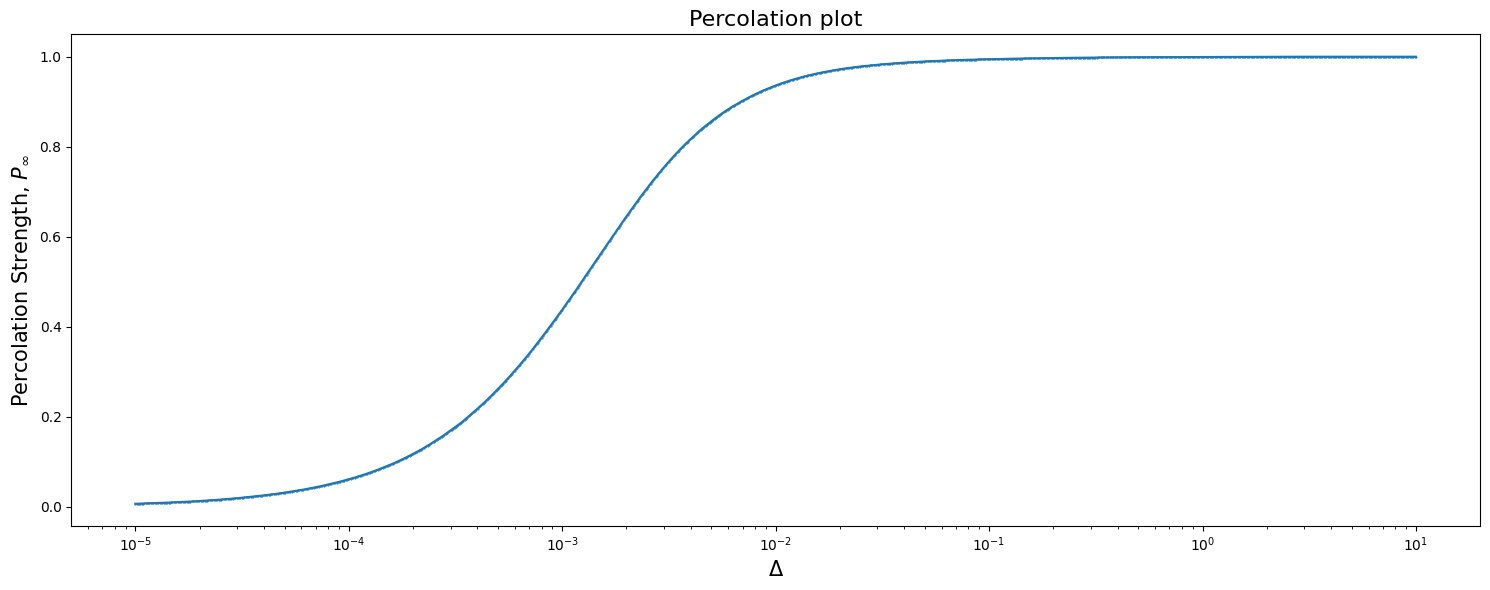

In [ ]:
K = 10**6
n = 1
mu = 10**-4

times_between_events, times, rate = generate_series_perc(K, n, mu)

deltas = np.logspace(-5, 1, num=1000, base=10)

percolations = []
for delta in deltas:
    percolations.append(np.sum((times_between_events) < delta)/K)

plt.figure(figsize=(15, 6))
plt.plot(deltas, percolations, marker = 'o', ms=0.5)
plt.xscale('log')
plt.xlabel('$\Delta$', fontsize=15)
plt.ylabel('Percolation Strength, $P_{\infty}$', fontsize=15)
plt.title('Percolation plot', fontsize=16)
plt.tight_layout()
plt.show()

## Final figure

Temporal series of $K=1E+01$ events generated
Percolation plot for K=1E+01, $\mu=1E+00$ done
Temporal series of $K=1E+02$ events generated
Percolation plot for K=1E+02, $\mu=1E+00$ done
Plot 0 done
Temporal series of $K=1E+01$ events generated
Percolation plot for K=1E+01, $\mu=1E-04$ done
Temporal series of $K=1E+02$ events generated
Percolation plot for K=1E+02, $\mu=1E-04$ done
Plot 1 done
Temporal series of $K=1E+01$ events generated
Percolation plot for K=1E+01, $\mu=1E+02$ done
Temporal series of $K=1E+02$ events generated
Percolation plot for K=1E+02, $\mu=1E+02$ done
Plot 2 done


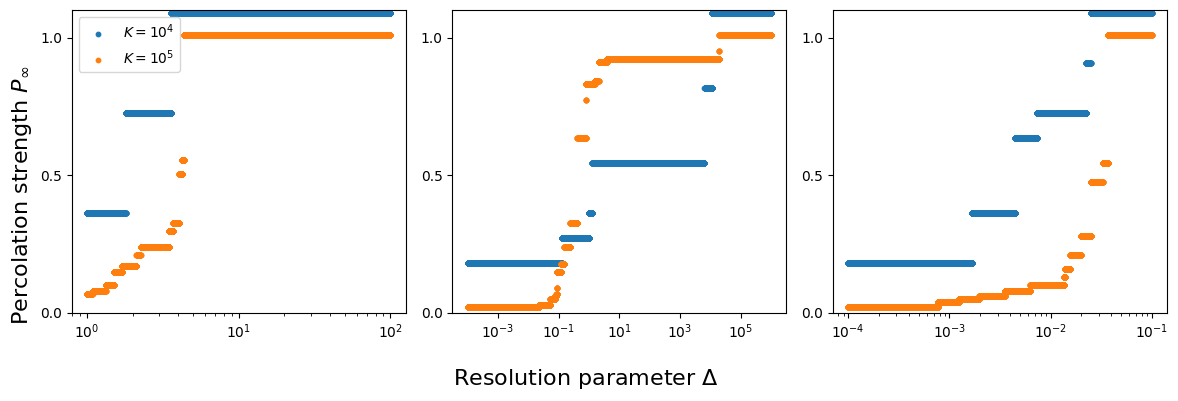

: 

In [ ]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]
labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(0, 2, num = 10000, base = 10), np.logspace(-4, 6, num = 10000, base = 10), np.logspace(-4, -1, num = 10000, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(5):
        K = 10**(_+4)
        print(f'Temporal series of $K={K:.0E}$ events generated')
        times_between_events, _, _ = generate_series_perc(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.scatter(delta, percolation_strength, s=10)
        print(f'Percolation plot for K={K:.0E}, $\mu={mu:.0E}$ done')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])
    print(f'Plot {i} done')

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()
fig.savefig('percolation_strength.png')

# Final figure

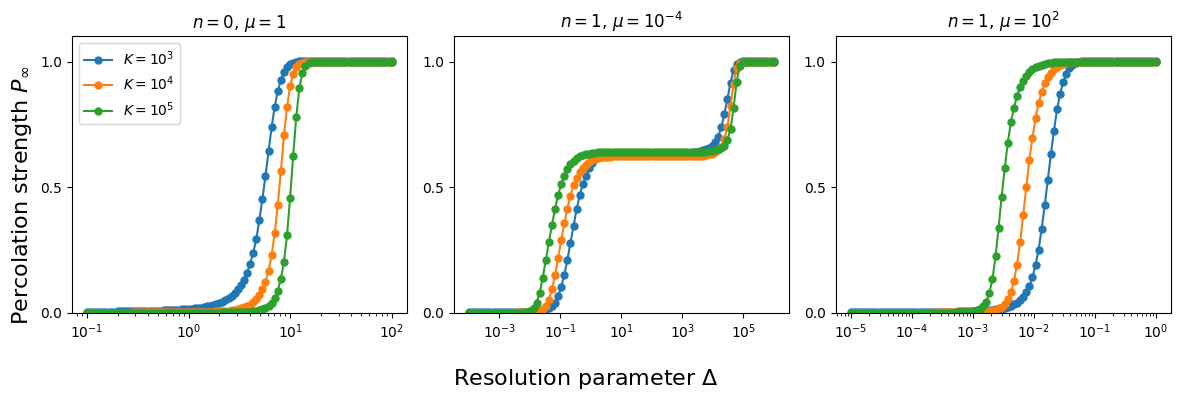

In [20]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**3
mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]

labels = ['$K=10^3$', '$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 100, base = 10), np.logspace(-4, 6, num = 100, base = 10), np.logspace(-5, 0, num = 100, base = 10)]
#np.save (f'./data/deltas_R={R}_article', deltas)

for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            times_between_events, _, _ = generate_series_perc(K, n, mu)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)
        
        percolation_means = np.mean(percolations, axis=0)
        np.save(f'./data/percolation_means_n={n}_mu={mu}_K={K},R={R}', percolation_means)
        ax.plot(delta, percolation_means, marker='o', markersize=5)
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=1$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=1$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

In [5]:
def calculate_percolation_strength_susc(times_between_events, deltas):
    """
    Calculate the percolation strength for a given set of deltas (resolution parameters)

    ## Inputs:
    times_between_events: time series of interevent times
    deltas: list of resolution parameters

    ## Output:
    percolation_strengths: list of percolation strengths
    """

    percolation_strengths = []
    
    for delta in deltas:
        cluster_sizes = []
        current_cluster_size = 1 # The first event is always a cluster
        
        for time in times_between_events:
            if time < delta:
                current_cluster_size += 1
            else:
                if current_cluster_size > 1: # Only consider clusters with more than one event
                    cluster_sizes.append(current_cluster_size)
                current_cluster_size = 1 # The next event is always a cluster
        
        if current_cluster_size > 1: # Consider the last cluster if it ends at the last event
            cluster_sizes.append(current_cluster_size)
         
        if len(cluster_sizes) != 0:  # Check if cluster_sizes is not empty to avoid errors
            max_cluster_size = max(cluster_sizes)
        else:
            max_cluster_size = 0
        
        percolation_strengths.append(max_cluster_size / len(times_between_events))
    
    return percolation_strengths, max_cluster_size


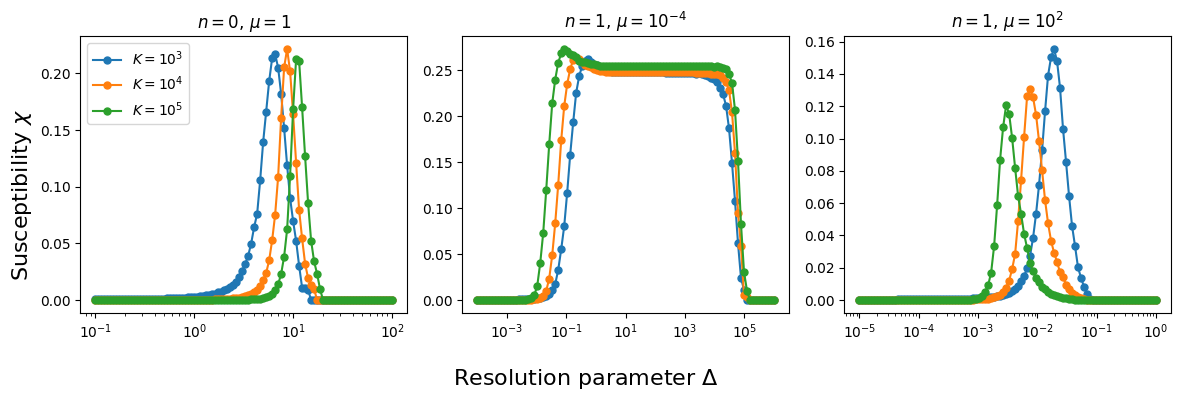

In [2]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**3
mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]

labels = ['$K=10^3$', '$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 100, base = 10), np.logspace(-4, 6, num = 100, base = 10), np.logspace(-5, 0, num = 100, base = 10)]
#np.save (f'./data/deltas_R={R}_article', deltas)

for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(3):
        K = 10**(_+3) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            times_between_events, _, _ = generate_series_perc(K, n, mu)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)

        susceptibility = np.std(percolations, axis=0)
        np.save(f'./data/percolation_std_n={n}_mu={mu}_K={K},R={R}', np.std(susceptibility, axis=0))
        ax.plot(delta, susceptibility, marker='o', markersize=5)

    ax.set_xscale('log')
    #ax.set_ylim(0, 0.4)  
    #ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=1$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=1$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Susceptibility $\chi$', fontsize=16)

fig.tight_layout()

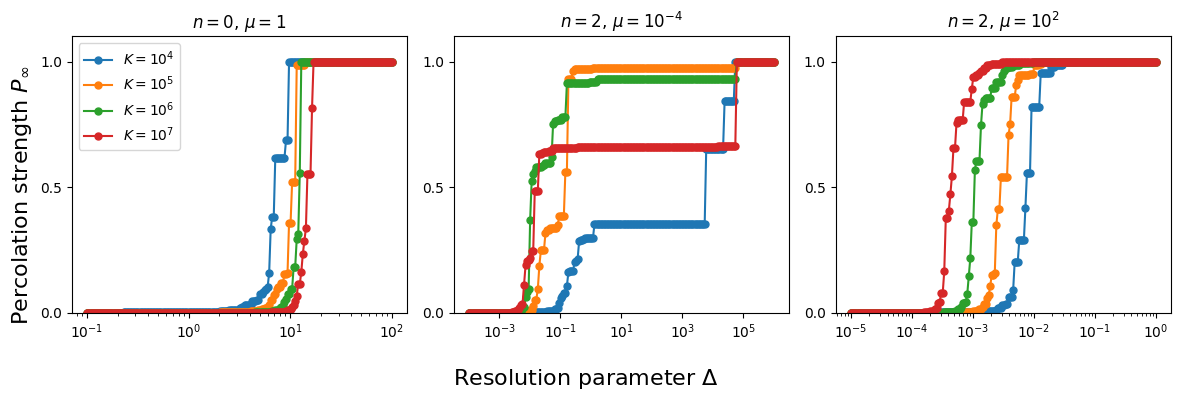

In [3]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

R = 10**0

mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]

labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(-1, 2, num = 200, base = 10), np.logspace(-4, 6, num = 200, base = 10), np.logspace(-5, 0, num = 200, base = 10)]
#np.save (f'./data/deltas_R={R}_article', deltas)

for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(4):
        K = 10**(_+4) # Cambiar a 3 cuando quiera la figura
        delta = deltas[i]
        percolations = np.zeros([R, len(delta)])
        
        for j in range(R):
            times_between_events, _, _ = generate_series_perc(K, n, mu)
            percolations[j,:] = calculate_percolation_strength(times_between_events, delta)
        
        percolation_means = np.mean(percolations, axis=0)
        #np.save(f'./data/percolation_means_n={n}_mu={mu}_K={K},R={R}', percolation_means)
        ax.plot(delta, percolation_means, marker='o', markersize=5)
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].set_title('$n=0$, $\mu=1$')
fig.axes[1].set_title('$n=1$, $\mu=10^{-4}$')
fig.axes[2].set_title('$n=1$, $\mu=10^{2}$')
fig.axes[0].legend(labels, loc='upper left', ncol=1, fontsize=10)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()

In [4]:
#times_between_events, _, _ = generate_series_perc(10**8, 0, 1)
#np.save('./data/K=10^8_n=0_mu=1', times_between_events)